# INSIGHTS

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('loan_approved.csv')

In [52]:
x=int(df['ApplicantIncome'].mean())
y=int(df['CoapplicantIncome'].std())
df['ApplicantIncome'].head()

0    5849
1    4583
2    3000
3    2583
4    6000
Name: ApplicantIncome, dtype: int64

In [53]:
print('z-scores:')
print('z1:',(5849-x)/y)
print('z2:',(4583-x)/y)
print('z3:',(3000-x)/y)
print('z4:',(2583-x)/y)
print('z5:',(6000-x)/y)

z-scores:
z1: 0.15242652084757347
z2: -0.2802460697197539
z3: -0.8212576896787424
z4: -0.963773069036227
z5: 0.20403280929596718


# Skewness values

In [54]:

sk1 = df['ApplicantIncome'].skew()
sk2 = df['CoapplicantIncome'].skew()
sk3 = df['LoanAmount'].skew()
sk4 = df['Loan_Amount_Term'].skew()

print("Skewness of ApplicantIncome:", sk1)
print("Skewness of CoapplicantIncome:", sk2)
print("Skewness of LoanAmount:", sk3)
print("Skewness of Loan_Amount_Term:", sk4)


Skewness of ApplicantIncome: 6.539513113994625
Skewness of CoapplicantIncome: 7.491531216657306
Skewness of LoanAmount: 2.677551679256059
Skewness of Loan_Amount_Term: -2.362414124216269


# Kurtosis values

In [55]:

kt1 = df['ApplicantIncome'].kurtosis()
kt2 = df['CoapplicantIncome'].kurtosis()
kt3 = df['LoanAmount'].kurtosis()
kt4 = df['Loan_Amount_Term'].kurtosis()

print("Kurtosis of ApplicantIncome:", kt1)
print("Kurtosis of CoapplicantIncome:", kt2)
print("Kurtosis of LoanAmount:", kt3)
print("Kurtosis of Loan_Amount_Term:", kt4)


Kurtosis of ApplicantIncome: 60.54067593369113
Kurtosis of CoapplicantIncome: 84.95638421103374
Kurtosis of LoanAmount: 10.40153349029416
Kurtosis of Loan_Amount_Term: 6.673473692814259


## one hot encoding

In [75]:
import pandas as pd
df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [76]:
df['Property_Area'].isna().sum()

np.int64(0)

In [77]:
pd.get_dummies(df['Property_Area'], dtype=int)


,Rural,Semiurban,Urban
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
609,1,0,0
610,1,0,0
611,0,0,1
612,0,0,1


In [78]:
pd.get_dummies(df['Property_Area'],dtype=int ,prefix='PA',drop_first=True)

,PA_Semiurban,PA_Urban
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
609,0,0
610,0,0
611,0,1
612,0,1


In [79]:
df1=pd.get_dummies(df['Property_Area'], prefix='Property_Area', drop_first=True)
df=pd.concat([df, df1], axis=1).drop(['Property_Area'], axis=1)
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status (Approved),Property_Area_Semiurban,Property_Area_Urban
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Y,False,True
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,N,False,False
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Y,False,True
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Y,False,True
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Y,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Y,False,False
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Y,False,False
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Y,False,True
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Y,False,True


In [80]:
df2=pd.get_dummies(df['Gender'], prefix='Gender', drop_first=True)
df=pd.concat([df, df2], axis=1).drop(['Gender'], axis=1)
df

,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status (Approved),Property_Area_Semiurban,Property_Area_Urban,Gender_Male
0,LP001002,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Y,False,True,True
1,LP001003,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,N,False,False,True
2,LP001005,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Y,False,True,True
3,LP001006,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Y,False,True,True
4,LP001008,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Y,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Y,False,False,False
610,LP002979,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Y,False,False,True
611,LP002983,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Y,False,True,True
612,LP002984,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Y,False,True,True


In [81]:
df3=pd.get_dummies(df['Married'], prefix='Married', drop_first=True)
df=pd.concat([df, df3], axis=1).drop(['Married'], axis=1)
df

,Loan_ID,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status (Approved),Property_Area_Semiurban,Property_Area_Urban,Gender_Male,Married_Yes
0,LP001002,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Y,False,True,True,False
1,LP001003,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,N,False,False,True,True
2,LP001005,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Y,False,True,True,True
3,LP001006,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Y,False,True,True,True
4,LP001008,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Y,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Y,False,False,False,False
610,LP002979,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Y,False,False,True,True
611,LP002983,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Y,False,True,True,True
612,LP002984,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Y,False,True,True,True


In [82]:
df3=pd.get_dummies(df['Education'], prefix='Education', drop_first=True)
df=pd.concat([df, df3], axis=1).drop(['Education'], axis=1)
df

,Loan_ID,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status (Approved),Property_Area_Semiurban,Property_Area_Urban,Gender_Male,Married_Yes,Education_Not Graduate
0,LP001002,0,No,5849,0.0,NaN,360.0,1.0,Y,False,True,True,False,False
1,LP001003,1,No,4583,1508.0,128.0,360.0,1.0,N,False,False,True,True,False
2,LP001005,0,Yes,3000,0.0,66.0,360.0,1.0,Y,False,True,True,True,False
3,LP001006,0,No,2583,2358.0,120.0,360.0,1.0,Y,False,True,True,True,True
4,LP001008,0,No,6000,0.0,141.0,360.0,1.0,Y,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,No,2900,0.0,71.0,360.0,1.0,Y,False,False,False,False,False
610,LP002979,3+,No,4106,0.0,40.0,180.0,1.0,Y,False,False,True,True,False
611,LP002983,1,No,8072,240.0,253.0,360.0,1.0,Y,False,True,True,True,False
612,LP002984,2,No,7583,0.0,187.0,360.0,1.0,Y,False,True,True,True,False


In [83]:
df4=pd.get_dummies(df['Self_Employed'], prefix='Self_Employed', drop_first=True)
df=pd.concat([df, df4], axis=1).drop(['Self_Employed'], axis=1)
df

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status (Approved),Property_Area_Semiurban,Property_Area_Urban,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes
0,LP001002,0,5849,0.0,NaN,360.0,1.0,Y,False,True,True,False,False,False
1,LP001003,1,4583,1508.0,128.0,360.0,1.0,N,False,False,True,True,False,False
2,LP001005,0,3000,0.0,66.0,360.0,1.0,Y,False,True,True,True,False,True
3,LP001006,0,2583,2358.0,120.0,360.0,1.0,Y,False,True,True,True,True,False
4,LP001008,0,6000,0.0,141.0,360.0,1.0,Y,False,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,2900,0.0,71.0,360.0,1.0,Y,False,False,False,False,False,False
610,LP002979,3+,4106,0.0,40.0,180.0,1.0,Y,False,False,True,True,False,False
611,LP002983,1,8072,240.0,253.0,360.0,1.0,Y,False,True,True,True,False,False
612,LP002984,2,7583,0.0,187.0,360.0,1.0,Y,False,True,True,True,False,False


In [84]:
df5=pd.get_dummies(df['Dependents'], prefix='Dependents', drop_first=True)
df=pd.concat([df, df5], axis=1).drop(['Dependents'], axis=1)
df

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status (Approved),Property_Area_Semiurban,Property_Area_Urban,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Dependents_1,Dependents_2,Dependents_3+
0,LP001002,5849,0.0,NaN,360.0,1.0,Y,False,True,True,False,False,False,False,False,False
1,LP001003,4583,1508.0,128.0,360.0,1.0,N,False,False,True,True,False,False,True,False,False
2,LP001005,3000,0.0,66.0,360.0,1.0,Y,False,True,True,True,False,True,False,False,False
3,LP001006,2583,2358.0,120.0,360.0,1.0,Y,False,True,True,True,True,False,False,False,False
4,LP001008,6000,0.0,141.0,360.0,1.0,Y,False,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,2900,0.0,71.0,360.0,1.0,Y,False,False,False,False,False,False,False,False,False
610,LP002979,4106,0.0,40.0,180.0,1.0,Y,False,False,True,True,False,False,False,False,True
611,LP002983,8072,240.0,253.0,360.0,1.0,Y,False,True,True,True,False,False,True,False,False
612,LP002984,7583,0.0,187.0,360.0,1.0,Y,False,True,True,True,False,False,False,True,False


In [85]:
df6=pd.get_dummies(df['Credit_History'], prefix='Credit_History', drop_first=True)
df=pd.concat([df, df6], axis=1).drop(['Credit_History'], axis=1)
df

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status (Approved),Property_Area_Semiurban,Property_Area_Urban,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Dependents_1,Dependents_2,Dependents_3+,Credit_History_1.0
0,LP001002,5849,0.0,NaN,360.0,Y,False,True,True,False,False,False,False,False,False,True
1,LP001003,4583,1508.0,128.0,360.0,N,False,False,True,True,False,False,True,False,False,True
2,LP001005,3000,0.0,66.0,360.0,Y,False,True,True,True,False,True,False,False,False,True
3,LP001006,2583,2358.0,120.0,360.0,Y,False,True,True,True,True,False,False,False,False,True
4,LP001008,6000,0.0,141.0,360.0,Y,False,True,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,2900,0.0,71.0,360.0,Y,False,False,False,False,False,False,False,False,False,True
610,LP002979,4106,0.0,40.0,180.0,Y,False,False,True,True,False,False,False,False,True,True
611,LP002983,8072,240.0,253.0,360.0,Y,False,True,True,True,False,False,True,False,False,True
612,LP002984,7583,0.0,187.0,360.0,Y,False,True,True,True,False,False,False,True,False,True


In [86]:
df7=pd.get_dummies(df['Loan_Status (Approved)'], prefix='Loan_Status', drop_first=True)
df=pd.concat([df, df7], axis=1).drop(['Loan_Status (Approved)'], axis=1)
df

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area_Semiurban,Property_Area_Urban,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Dependents_1,Dependents_2,Dependents_3+,Credit_History_1.0,Loan_Status_Y
0,LP001002,5849,0.0,NaN,360.0,False,True,True,False,False,False,False,False,False,True,True
1,LP001003,4583,1508.0,128.0,360.0,False,False,True,True,False,False,True,False,False,True,False
2,LP001005,3000,0.0,66.0,360.0,False,True,True,True,False,True,False,False,False,True,True
3,LP001006,2583,2358.0,120.0,360.0,False,True,True,True,True,False,False,False,False,True,True
4,LP001008,6000,0.0,141.0,360.0,False,True,True,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,2900,0.0,71.0,360.0,False,False,False,False,False,False,False,False,False,True,True
610,LP002979,4106,0.0,40.0,180.0,False,False,True,True,False,False,False,False,True,True,True
611,LP002983,8072,240.0,253.0,360.0,False,True,True,True,False,False,True,False,False,True,True
612,LP002984,7583,0.0,187.0,360.0,False,True,True,True,False,False,False,True,False,True,True


In [87]:
df.columns

Index(['Loan_ID', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Gender_Male', 'Married_Yes', 'Education_Not Graduate',
       'Self_Employed_Yes', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Credit_History_1.0', 'Loan_Status_Y'],
      dtype='object')

# Transformation

<Axes: xlabel='LoanAmount', ylabel='Count'>

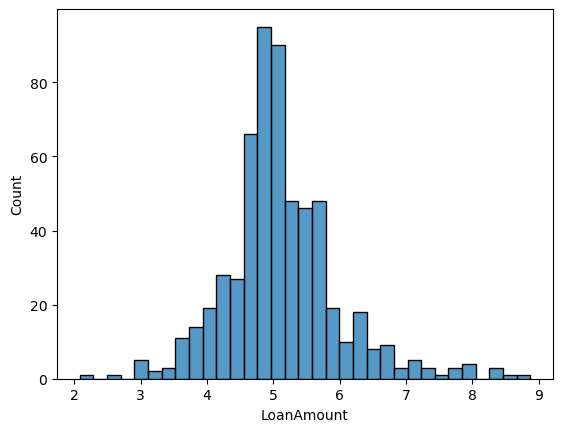

In [89]:
sns.histplot(data["LoanAmount"]**(1/3))